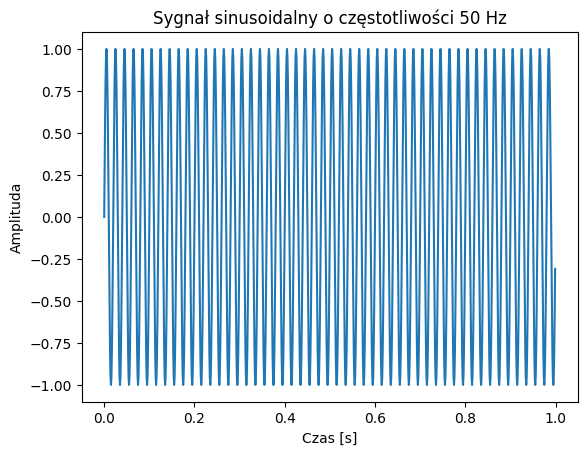

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
fs = 1000  # częstotliwość próbkowania
f = 50  # częstotliwość sygnału
N = 65536  # liczba próbek

# Generowanie sygnału
t = np.arange(N) / fs
signal = np.sin(2 * np.pi * f * t)

# Wyświetlenie sygnału
plt.plot(t[:1000], signal[:1000])  # wyświetlamy tylko pierwsze 1000 próbek dla czytelności
plt.title('Sygnał sinusoidalny o częstotliwości 50 Hz')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.show()

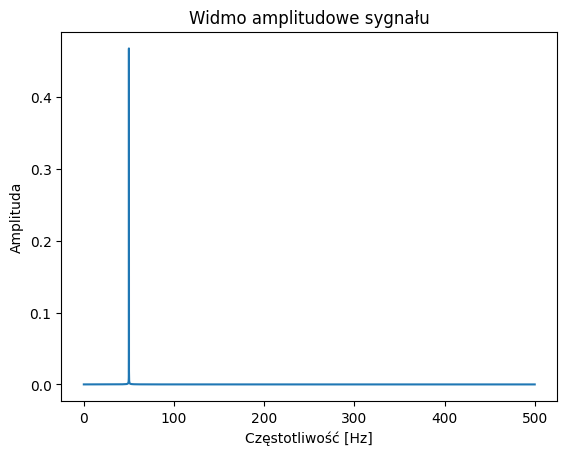

In [15]:
# Wyznaczenie DFT sygnału
signal_fft = np.fft.fft(signal)
signal_fft_magnitude = np.abs(signal_fft) / N

# Wyznaczenie osi częstotliwości
freqs = np.fft.fftfreq(N, 1/fs)

# Wyświetlenie widma amplitudowego w zakresie [0, fs/2]
plt.plot(freqs[:N//2], signal_fft_magnitude[:N//2])
plt.title('Widmo amplitudowe sygnału')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()

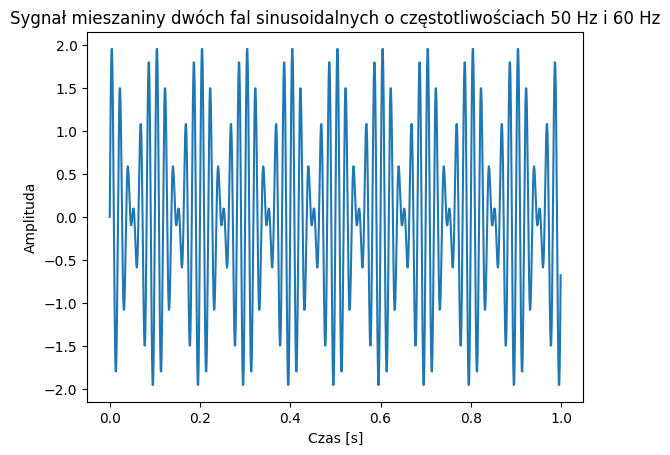

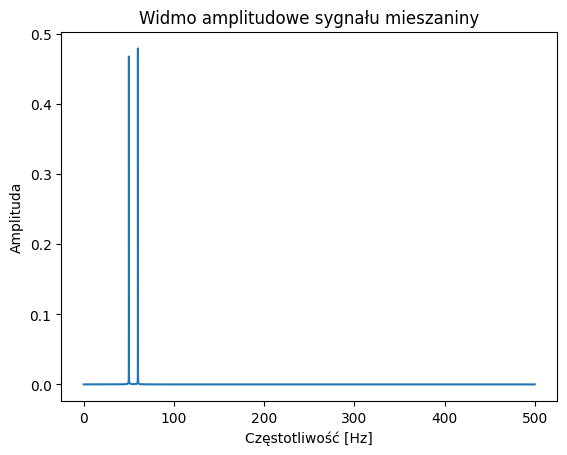

In [16]:
# Parametry sygnałów
f1 = 50  # częstotliwość pierwszego sygnału
f2 = 60  # częstotliwość drugiego sygnału

# Generowanie sygnału mieszaniny dwóch fal sinusoidalnych
signal_mixed = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Wyświetlenie sygnału mieszaniny
plt.plot(t[:1000], signal_mixed[:1000])  # wyświetlamy tylko pierwsze 1000 próbek dla czytelności
plt.title('Sygnał mieszaniny dwóch fal sinusoidalnych o częstotliwościach 50 Hz i 60 Hz')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.show()

# Wyznaczenie DFT sygnału mieszaniny
signal_mixed_fft = np.fft.fft(signal_mixed)
signal_mixed_fft_magnitude = np.abs(signal_mixed_fft) / N

# Wyświetlenie widma amplitudowego sygnału mieszaniny w zakresie [0, fs/2]
plt.plot(freqs[:N//2], signal_mixed_fft_magnitude[:N//2])
plt.title('Widmo amplitudowe sygnału mieszaniny')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()

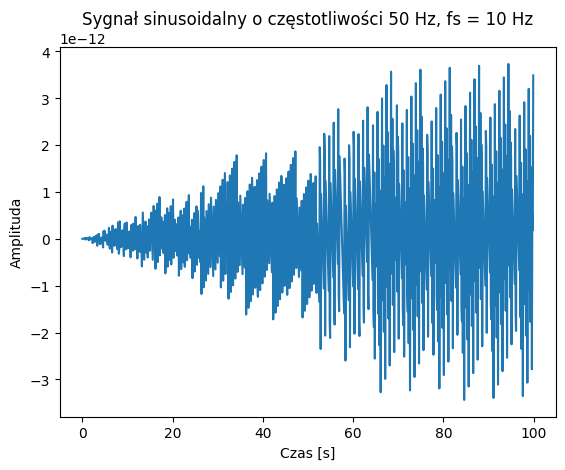

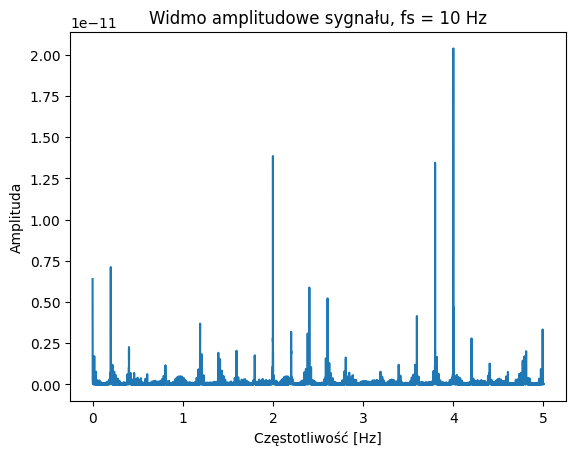

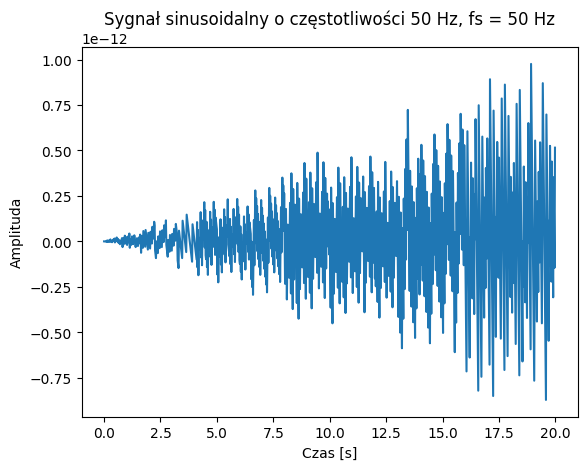

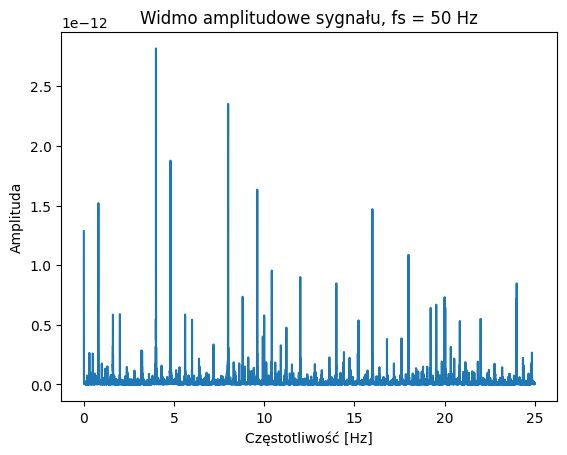

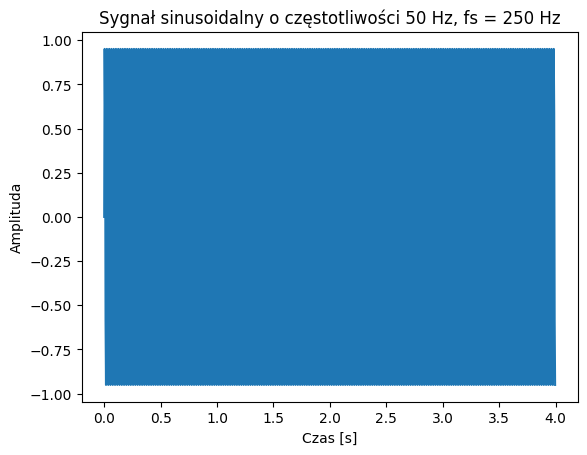

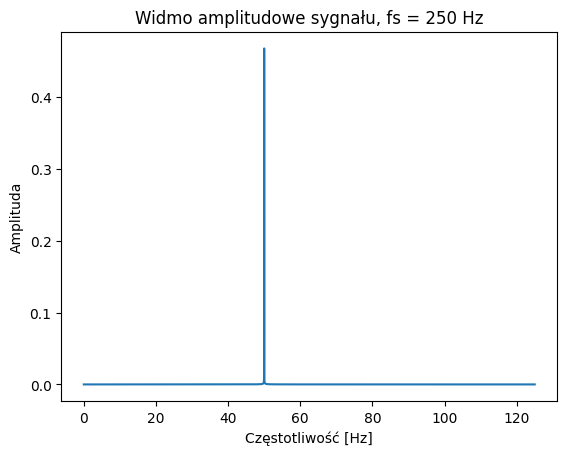

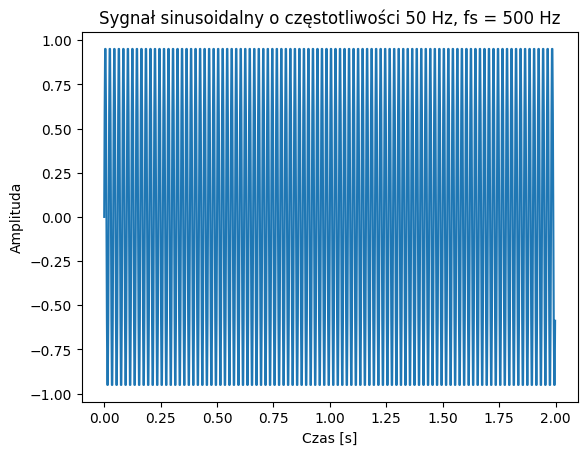

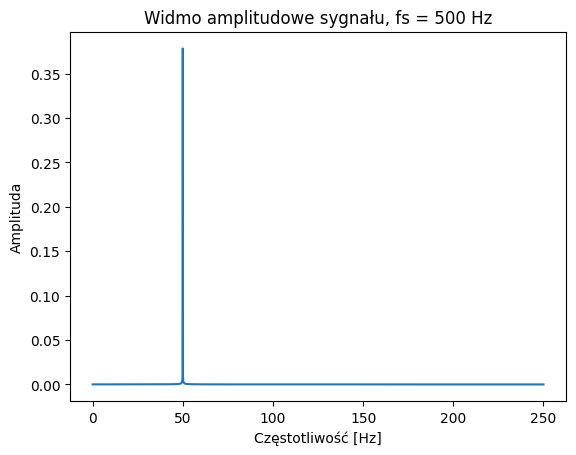

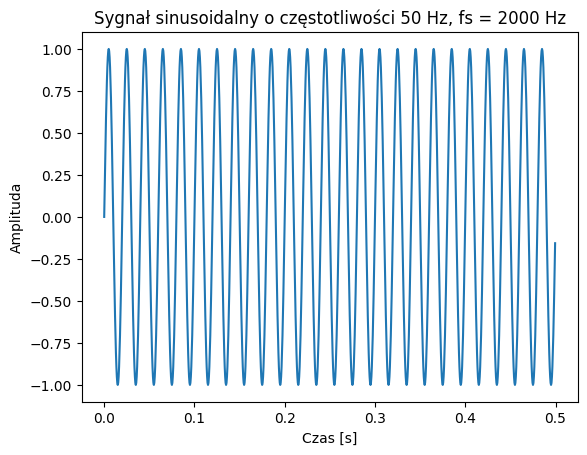

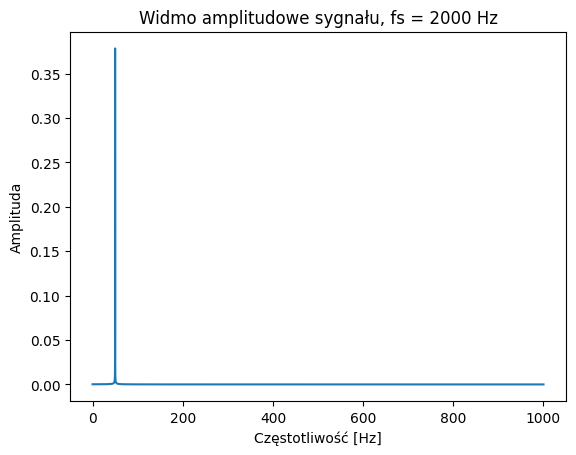

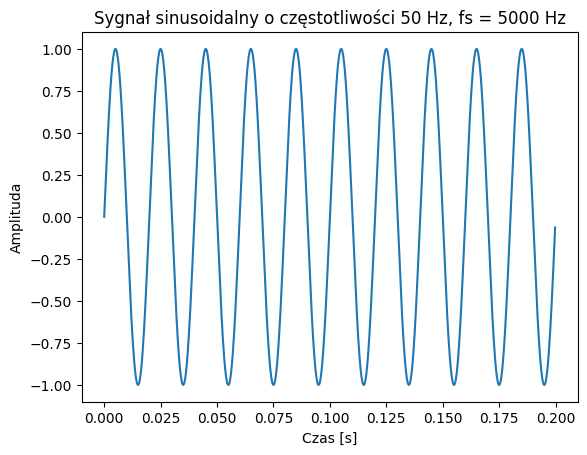

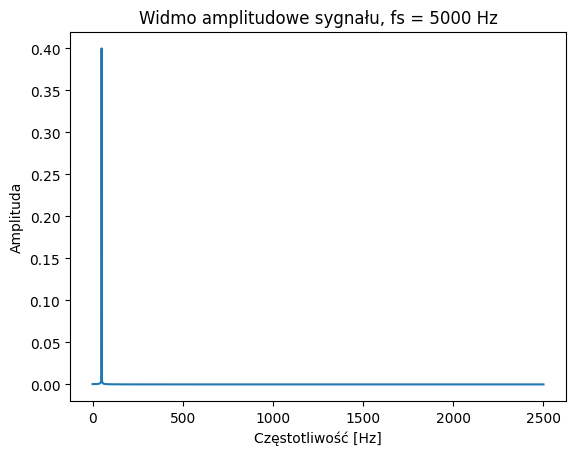

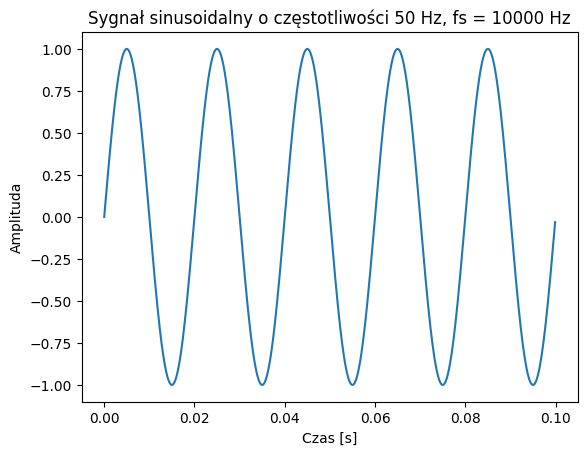

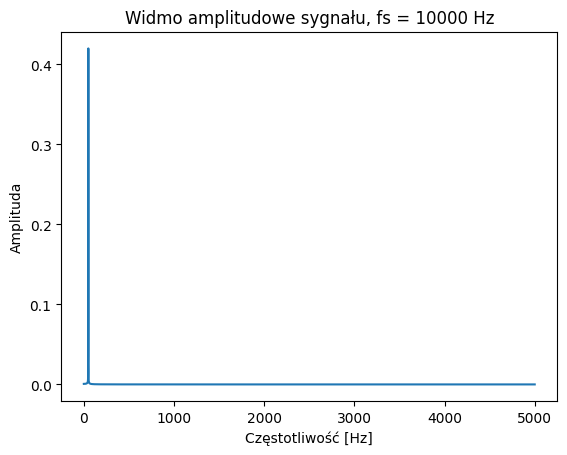

In [17]:
fs_values = [10,50,250,500,2000,5000,10000]

for fs_new in fs_values:
    t_new = np.arange(N) / fs_new
    signal_new = np.sin(2 * np.pi * f * t_new)
    
    plt.plot(t_new[:1000], signal_new[:1000])  
    plt.title(f'Sygnał sinusoidalny o częstotliwości 50 Hz, fs = {fs_new} Hz')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.show()
    signal_new_fft = np.fft.fft(signal_new)
    signal_new_fft_magnitude = np.abs(signal_new_fft) / N
    freqs_new = np.fft.fftfreq(N, 1/fs_new)
    plt.plot(freqs_new[:N//2], signal_new_fft_magnitude[:N//2])
    plt.title(f'Widmo amplitudowe sygnału, fs = {fs_new} Hz')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.show()

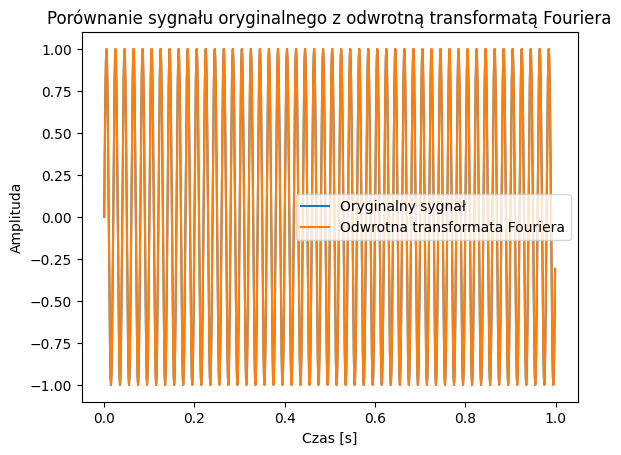

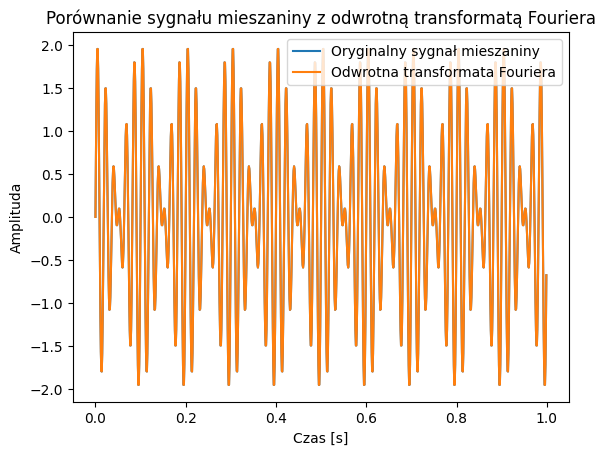

In [18]:
# Odwrotna transformata Fouriera dla sygnału oryginalnego
signal_ifft = np.fft.ifft(signal_fft)

# Odwrotna transformata Fouriera dla sygnału mieszaniny
signal_mixed_ifft = np.fft.ifft(signal_mixed_fft)

# Porównanie sygnału oryginalnego z odwrotną transformatą
plt.plot(t[:1000], signal[:1000], label='Oryginalny sygnał')
plt.plot(t[:1000], signal_ifft[:1000].real, label='Odwrotna transformata Fouriera')
plt.title('Porównanie sygnału oryginalnego z odwrotną transformatą Fouriera')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.show()

# Porównanie sygnału mieszaniny z odwrotną transformatą
plt.plot(t[:1000], signal_mixed[:1000], label='Oryginalny sygnał mieszaniny')
plt.plot(t[:1000], signal_mixed_ifft[:1000].real, label='Odwrotna transformata Fouriera')
plt.title('Porównanie sygnału mieszaniny z odwrotną transformatą Fouriera')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.show()